In [1]:
import datetime, time
import pytz

tz = pytz.timezone('US/Central')
print(tz)

# unix time to '2017-11-01 15:52:00'
def unixtime_to_datetime_pre(timestamp):
    timestamp = timestamp/1000
    dt = datetime.datetime.fromtimestamp(timestamp, tz).strftime('%m-%d-%Y %H:%M:%S')
    return dt
    
def unixtime_to_datetime(timestamp):
    timestamp = timestamp/1000
    dt = datetime.datetime.fromtimestamp(timestamp, tz).strftime('%m/%d %H:%M:%S')
    return dt
   

#unix time to  '2017-11-01 15:52:00' -> '2017-11-01'
def unixtime_to_date(timestamp):
    dt = unixtime_to_datetime(timestamp)
    return dt.split(' ')[0]

#unix time to  '2017-11-01 15:52:00' -> '15:52:00'
def unixtime_to_time(timestamp):
    dt = unixtime_to_datetime(timestamp)
    return dt.split(' ')[1]

#unix time to '15*52' in minutes
def unixtime_to_timeOfDay(timestamp):    
    tm = unixtime_to_time(timestamp)
    toks = tm.split(':')
    h = int(toks[0])
    m = int(toks[1])
    timeOfday = h*60 + m    
    return timeOfday

ut = 1512506705814 # 1386181800

print(unixtime_to_datetime(ut))
print(unixtime_to_date(ut))
print(unixtime_to_time(ut))
print(unixtime_to_timeOfDay(ut))


US/Central
12/05 14:45:05
12/05
14:45:05
885


69009c83-efcb-31f8-be0a-b70afb5a79f3
4c5f9446-48b2-3139-b895-922ffbcec083
4cc2f061-262a-38f1-a129-dc35f3627732


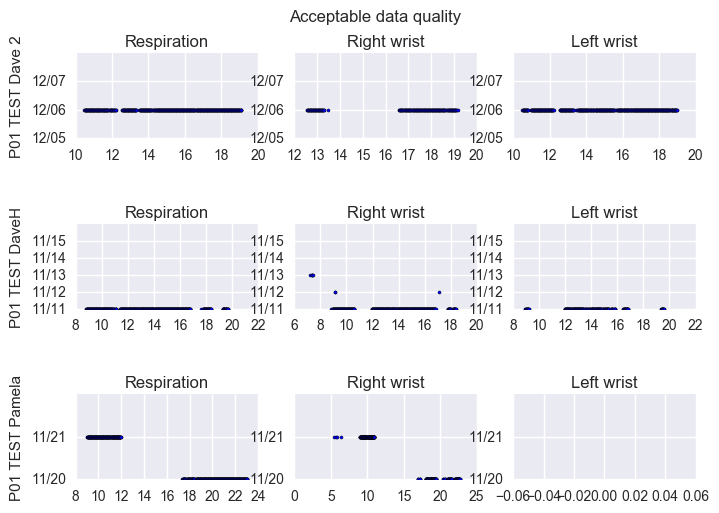

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pathlib import Path
import os.path


from scipy import stats
import seaborn as sns

SENSOR_UNAVAILABLE = 4
DATA_LOST = 6
SENSOR_OFF_BODY = 8
SENSOR_ON_BODY = 9
IMPROPER_ATTACHMENT = 10
DELAY_IN_ATTACHMENT = 12
SENSOR_BATTERY_DOWN = 14
PHONE_BATTERY_DOWN_LABEL = 16
SENSOR_POWERED_OFF = 18
PHONE_POWERED_OFF_LABEL = 20
ACCEPTABLE_DATA = 22

rip_dataquality_filename = 'rip_diagnostic.txt'
rightwrist_dataquality_filename = 'motionsense_right_diagnostic.txt'
leftwrist_dataquality_filename = 'motionsense_left_diagnostic.txt'

def getAndUpdateData(cur_dir, filename):
#     print(cur_dir+filename)
    D = None
    my_file = Path(cur_dir + filename)
    if my_file.is_file():
        col_name = ['start_datetime', 'end_datetime', 'label']
        D = pd.read_csv(cur_dir + filename, names = col_name)

        D['date'] = [unixtime_to_date(sdt) for sdt in D['start_datetime']]
        D['time_of_day'] = [unixtime_to_timeOfDay(sdt) for sdt in D['start_datetime']]
#         D['end_date'] = [tu.unixtime_to_date(sdt) for sdt in D['end_datetime']]
#         D['end_time_of_day'] = [tu.unixtime_to_timeOfDay(sdt) for sdt in D['end_datetime']]
    return D

def plotGoodDQ(DQ, r, c, iPlace, sensor):
    dates = DQ['date'].unique()
    fig.add_subplot(r, c, iPlace)  
    X = []
    Y = []
    for j in range(len(dates)):
        dt = dates[j]
        D = DQ[DQ['date'] == dt]
        indx = D['time_of_day']
        
        for i in indx:
#             plt.scatter(i/60.0, j)
            X.append(i/60.0)
            Y.append(j)

    plt.scatter(X, Y, marker='.')
    plt.title(sensor)
    plt.yticks(np.arange(0, len(dates), 1), dates)
    plt.ylim(0, len(dates))
    plt.xlim(0, 24)
#     plt.ylabel('Time of day (in hours)')

def getNUConfiq():
    basedir = 'C:\\Users\\sakther\\Documents\\python_workshop\\md2k_mCerebralCortex\\nu_dataquality\\'
    pids = ['101', '102', '103', '104', '105', '201', '202', '205', '206', '208', '209']
    uids = ['101', '102', '103', '104', '105', '201', '202', '205', '206', '208', '209']
    return basedir, pids, uids

def getRiceConfiq():
    basedir = 'C:\\Users\\sakther\\Documents\\python_workshop\\md2k_mCerebralCortex\\rice_pilot_dataquality\\'
    pids = ['2006', '2007', '2008', '2009', '2010', '2011', '2012']
    pids = ['2007', '2011']
    uids =  ['2006', '2007', '2008', '2009', '2010', '2011', '2012']
    uids = ['2007', '2011']
    return basedir, pids, uids

def getUtahConfiq():
    basedir = 'C:\\Users\\sakther\\Documents\\python_workshop\\md2k_mCerebralCortex\\dataquality\\'

    pids = ['69009c83-efcb-31f8-be0a-b70afb5a79f3', '4c5f9446-48b2-3139-b895-922ffbcec083', '4cc2f061-262a-38f1-a129-dc35f3627732']
    uids = ['P01 TEST Dave 2', 'P01 TEST DaveH', 'P01 TEST Pamela']
    
    return basedir, pids, uids

# basedir, pids, uids = getNUConfiq()
basedir, pids, uids = getUtahConfiq()
# basedir, pids, uids = getRiceConfiq()


fig = plt.figure()
plt.suptitle('Acceptable data quality')
fig.subplots_adjust(hspace=1.0)

nRow = len(pids)
nCol = 3

for i in range(len(pids)):
    pid = pids[i]
    print(pid)

    ripDQ = getAndUpdateData(basedir, pid+rip_dataquality_filename)
    rwDQ = getAndUpdateData(basedir, pid+rightwrist_dataquality_filename)
    lwDQ = getAndUpdateData(basedir, pid+leftwrist_dataquality_filename)
    
    plotGoodDQ(ripDQ, nRow, nCol, i*3+1, 'Respiration')
    plt.ylabel(uids[i])
    plotGoodDQ(rwDQ, nRow, nCol, i*3+2, 'Right wrist')
    plotGoodDQ(lwDQ, nRow, nCol, i*3+3, 'Left wrist')
    
plt.show()

    

2006
15667
2007
19843
2011
28519


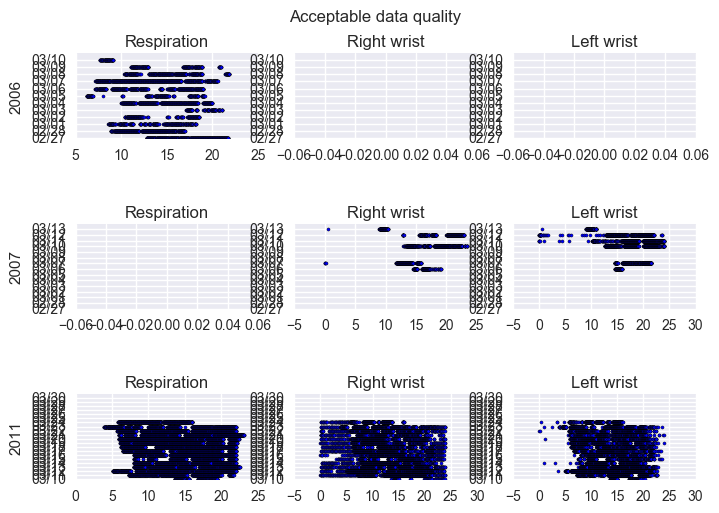

In [63]:
# basedir, pids, uids = getNUConfiq()
# basedir, pids, uids = getUtahConfiq()
basedir, pids, uids = getRiceConfiq()


fig = plt.figure()
plt.suptitle('Acceptable data quality')
fig.subplots_adjust(hspace=1.0)

nRow = len(pids)
nCol = 3

for i in range(len(pids)):
    pid = pids[i]
    print(pid)

    ripDQ = getAndUpdateData(basedir, pid+rip_dataquality_filename)
    rwDQ = getAndUpdateData(basedir, pid+rightwrist_dataquality_filename)
    lwDQ = getAndUpdateData(basedir, pid+leftwrist_dataquality_filename)
    print(len(ripDQ))
    plotGoodDQ(ripDQ, nRow, nCol, i*3+1, 'Respiration')
    plt.ylabel(uids[i])
    plotGoodDQ(rwDQ, nRow, nCol, i*3+2, 'Right wrist')
    plotGoodDQ(lwDQ, nRow, nCol, i*3+3, 'Left wrist')
    
plt.show()
